## 1. Introduction
<p><img src="https://assets.datacamp.com/production/project_1197/img/google_play_store.png" alt="Google Play logo"></p>
<p>Mobile apps are everywhere. They are easy to create and can be very lucrative from the business standpoint. Specifically, Android is expanding as an operating system and has captured more than 74% of the total market<sup><a href="https://www.statista.com/statistics/272698/global-market-share-held-by-mobile-operating-systems-since-2009">[1]</a></sup>. </p>
<p>The Google Play Store apps data has enormous potential to facilitate data-driven decisions and insights for businesses. In this notebook, we will analyze the Android app market by comparing ~10k apps in Google Play across different categories. We will also use the user reviews to draw a qualitative comparision between the apps.</p>
<p>The dataset you will use here was scraped from Google Play Store in September 2018 and was published on <a href="https://www.kaggle.com/lava18/google-play-store-apps">Kaggle</a>. Here are the details: <br>
<br></p>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/apps.csv</b></div>
This file contains all the details of the apps on Google Play. There are 9 features that describe a given app.
<ul>
    <li><b>App:</b> Name of the app</li>
    <li><b>Category:</b> Category of the app. Some examples are: ART_AND_DESIGN, FINANCE, COMICS, BEAUTY etc.</li>
    <li><b>Rating:</b> The current average rating (out of 5) of the app on Google Play</li>
    <li><b>Reviews:</b> Number of user reviews given on the app</li>
    <li><b>Size:</b> Size of the app in MB (megabytes)</li>
    <li><b>Installs:</b> Number of times the app was downloaded from Google Play</li>
    <li><b>Type:</b> Whether the app is paid or free</li>
    <li><b>Price:</b> Price of the app in US$</li>
    <li><b>Last Updated:</b> Date on which the app was last updated on Google Play </li>

</ul>
</div>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/user_reviews.csv</b></div>
This file contains a random sample of 100 <i>[most helpful first](https://www.androidpolice.com/2019/01/21/google-play-stores-redesigned-ratings-and-reviews-section-lets-you-easily-filter-by-star-rating/)</i> user reviews for each app. The text in each review has been pre-processed and passed through a sentiment analyzer.
<ul>
    <li><b>App:</b> Name of the app on which the user review was provided. Matches the `App` column of the `apps.csv` file</li>
    <li><b>Review:</b> The pre-processed user review text</li>
    <li><b>Sentiment Category:</b> Sentiment category of the user review - Positive, Negative or Neutral</li>
    <li><b>Sentiment Score:</b> Sentiment score of the user review. It lies between [-1,1]. A higher score denotes a more positive sentiment.</li>

</ul>
</div>
<p>From here on, it will be your task to explore and manipulate the data until you are able to answer the three questions described in the instructions panel.<br></p>

## import libraies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import seaborn as sns

## cleaning  data and correcting types

In [2]:
apps=pd.read_csv("datasets/apps.csv")
apps=apps.drop_duplicates()
apps.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0.0,"January 7, 2018"
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0.0,"January 15, 2018"
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0.0,"August 1, 2018"
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0.0,"June 8, 2018"
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0.0,"June 20, 2018"


In [3]:
apps.count()

App             9659
Category        9659
Rating          8196
Reviews         9659
Size            8432
Installs        9659
Type            9659
Price           9659
Last Updated    9659
dtype: int64

In [4]:
apps.isna().any()

App             False
Category        False
Rating           True
Reviews         False
Size             True
Installs        False
Type            False
Price           False
Last Updated    False
dtype: bool

In [5]:
chars_to_remove = [',','+','$']

cols_to_clean = ['Installs','Price']


for col in cols_to_clean:
    
    for char in chars_to_remove:
        apps[col] = apps[col].apply(lambda x: str(x).replace(char, ''))        
apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,"January 7, 2018"
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,"January 15, 2018"
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,"August 1, 2018"
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,"June 8, 2018"
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,"June 20, 2018"


In [6]:
apps['Installs'] = apps['Installs'].astype(int)
apps['Price'] = apps['Price'].astype(float)
print(apps.dtypes)

App              object
Category         object
Rating          float64
Reviews           int64
Size            float64
Installs          int32
Type             object
Price           float64
Last Updated     object
dtype: object


## exploring app caterogy

We  see that there are 33 unique app categories present in our dataset. Family and Game apps have the highest market prevalence. Interestingly, Tools, Business and Medical apps are also at the top.

In [7]:
num_categories = len(apps['Category'].unique())
print('Number of categories = ', num_categories)

num_apps_in_category = apps['Category'].value_counts()

sorted_num_apps_in_category = num_apps_in_category.sort_values(ascending = False)

data = [go.Bar(
        x = num_apps_in_category.index, # index = category name
        y = num_apps_in_category.values, # value = count
)]

Number of categories =  33


In [8]:
plotly.offline.iplot(data)


In [9]:
avg_app_rating = apps['Rating'].mean()
print('Average app rating = ', avg_app_rating)

# Distribution of apps according to their ratings
data = [go.Histogram(
        x = apps['Rating']
)]

# Vertical dashed line to indicate the average app rating
layout = {'shapes': [{
              'type' :'line',
              'x0': avg_app_rating,
              'y0': 0,
              'x1': avg_app_rating,
              'y1': 1000,
              'line': { 'dash': 'dashdot'}
          }]
          }

plotly.offline.iplot({'data': data, 'layout': layout})

Average app rating =  4.173243045387998


In [10]:
apps_with_size_and_rating_present = apps[(~apps['Rating'].isnull()) &
                                         (~apps['Size'].isnull())]

In [11]:
apps_with_size_and_rating_present.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,"January 7, 2018"
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,"January 15, 2018"
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,"August 1, 2018"
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,"June 8, 2018"
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,"June 20, 2018"


In [12]:
# Subset for categories with at least 250 apps
large_categories = apps_with_size_and_rating_present.groupby(['Category']).filter(lambda x: len(x) >= 250)


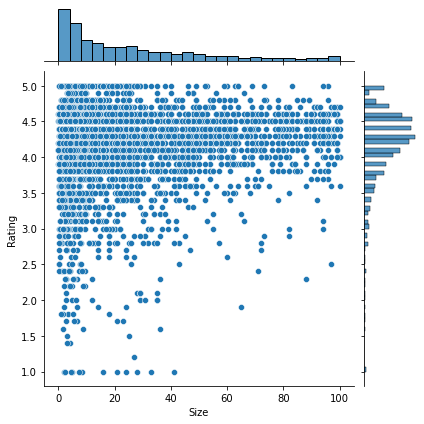

In [13]:
# Plot size vs. rating
plt1 = sns.jointplot(x = large_categories['Size'], y = large_categories['Rating'])

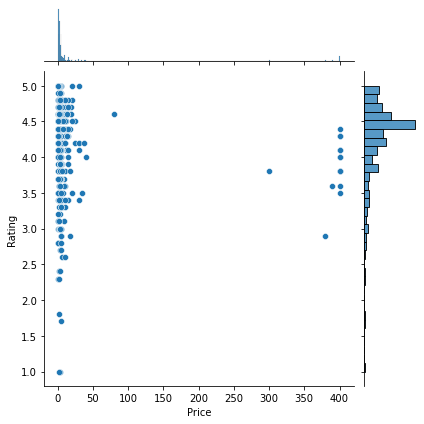

In [21]:
paid_apps = apps_with_size_and_rating_present[apps_with_size_and_rating_present['Type'] == 'Paid']
# Plot price vs. rating
plt2 = sns.jointplot(x = paid_apps['Price'], y = paid_apps['Rating'])

we can say that small size and free  apps are more preferable for android users 

### Relation between category and price

In [23]:
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

,Category,App,Price
3327,FAMILY,most expensive app (H),399.99
3465,LIFESTYLE,💎 I'm rich,399.99
3469,LIFESTYLE,I'm Rich - Trump Edition,400.00
4396,LIFESTYLE,I am rich,399.99
4398,FAMILY,I am Rich Plus,399.99
4399,LIFESTYLE,I am rich VIP,299.99
4400,FINANCE,I Am Rich Premium,399.99
4401,LIFESTYLE,I am extremely Rich,379.99
4402,FINANCE,I am Rich!,399.99
4403,FINANCE,I am rich(premium),399.99


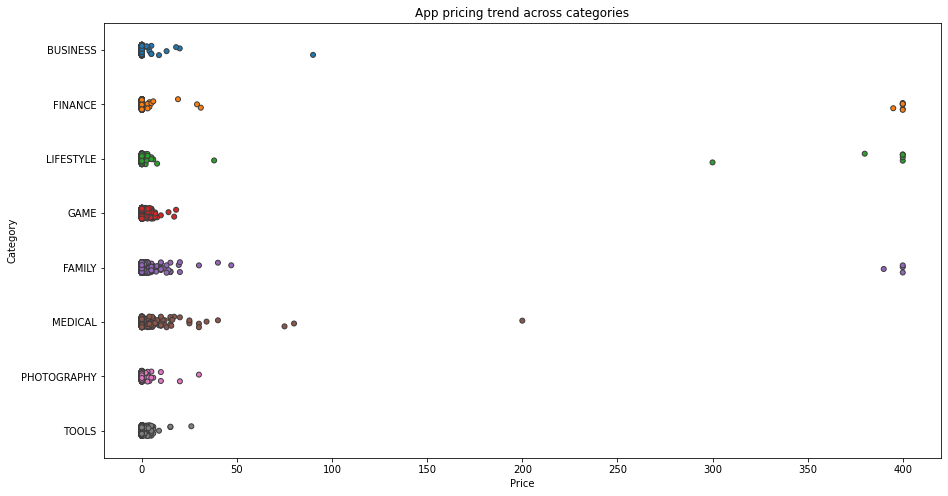

In [25]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Examine the price trend by plotting Price vs Category
ax = sns.stripplot(x = popular_app_cats["Price"], y = popular_app_cats["Category"], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

# Apps whose Price is greater than 200
apps_above_200 = popular_app_cats[popular_app_cats["Price"]>200]
apps_above_200[['Category', 'App', 'Price']]

In [27]:
apps_under_100=popular_app_cats[popular_app_cats["Price"]>100]
apps_under_100.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Last Updated
3327,most expensive app (H),FAMILY,4.3,6,1.5,100,Paid,399.99,"July 16, 2018"
3465,💎 I'm rich,LIFESTYLE,3.8,718,26.0,10000,Paid,399.99,"March 11, 2018"
3469,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3,10000,Paid,400.00,"May 3, 2018"
4396,I am rich,LIFESTYLE,3.8,3547,1.8,100000,Paid,399.99,"January 12, 2018"
4398,I am Rich Plus,FAMILY,4.0,856,8.7,10000,Paid,399.99,"May 19, 2018"


Text(0.5, 1.0, 'App pricing trend across categories after filtering for junk apps')

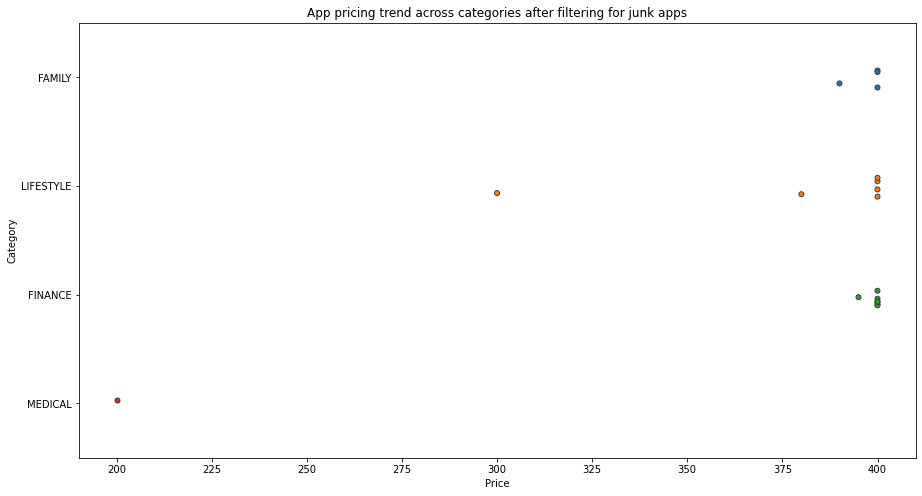

In [29]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Examine the price trend by plotting Price vs Category
ax = sns.stripplot(x = apps_under_100["Price"], y = apps_under_100["Category"], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories after filtering for junk apps')

## Popularity of paid apps vs free apps

here we will compare the number of installs of paid apps vs. number of installs of free apps.

In [31]:
trace0 = go.Box(
    # Data for paid apps
    y = apps[apps['Type'] == "Paid"]['Installs'],
    name = 'Paid'
)

trace1 = go.Box(
    # Data for free apps
    y = apps[apps['Type'] == "Free"]['Installs'],
    name = 'Free'
)
layout = go.Layout(
    title = "Number of downloads of paid apps vs. free apps",
    yaxis = dict(title = "Log number of downloads",
                type = 'log',
                autorange = True)
)

# Add trace0 and trace1 to a list for plotting
lst = [trace0, trace1]
plotly.offline.iplot({'data': lst, 'layout': layout})

# Sentiment analysis of user reviews

Mining user review data to determine how people feel about your product, brand, or service can be done using a technique called sentiment analysis. User reviews for apps can be analyzed to identify if the mood is positive, negative or neutral about that app. For example, positive words in an app review might include words such as 'amazing', 'friendly', 'good', 'great', and 'love'. Negative words might be words like 'malware', 'hate', 'problem', 'refund', and 'incompetent'.

In [34]:
reviews_df=pd.read_csv("datasets/user_reviews.csv")
reviews_df.head()

,App,Review,Sentiment Category,Sentiment Score
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25
2,10 Best Foods for You,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40
4,10 Best Foods for You,Best idea us,Positive,1.00


In [36]:
merged_df=apps.merge(reviews_df)

In [37]:
merged_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Last Updated,Review,Sentiment Category,Sentiment Score
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,"January 15, 2018",A kid's excessive ads. The types ads allowed a...,Negative,-0.250
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,"January 15, 2018",It bad >:(,Negative,-0.725
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,"January 15, 2018",like,Neutral,0.000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,"January 15, 2018",NaN,NaN,NaN
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,"January 15, 2018",I love colors inspyering,Positive,0.500


In [39]:
merged_df = merged_df.dropna(subset = ['Sentiment Category', 'Review'])

In [40]:
merged_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Last Updated,Review,Sentiment Category,Sentiment Score
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,"January 15, 2018",A kid's excessive ads. The types ads allowed a...,Negative,-0.250
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,"January 15, 2018",It bad >:(,Negative,-0.725
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,"January 15, 2018",like,Neutral,0.000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,"January 15, 2018",I love colors inspyering,Positive,0.500
5,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,"January 15, 2018",I hate,Negative,-0.800


Text(0.5, 1.0, 'Sentiment Polarity Distribution')

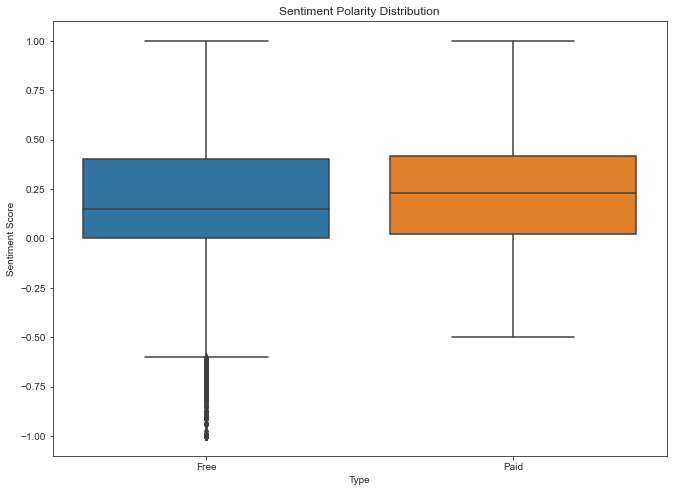

In [48]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

ax = sns.boxplot(x = 'Type', y = 'Sentiment Score', data = merged_df)
ax.set_title('Sentiment Polarity Distribution')

By plotting sentiment polarity scores of user reviews for paid and free apps, we observe that free apps receive a lot of harsh comments, as indicated by the outliers on the negative y-axis. Reviews for paid apps appear never to be extremely negative. This may indicate something about app quality, i.e., paid apps being of higher quality than free apps on average. The median polarity score for paid apps is a little higher than free apps, thereby syncing with our previous observation